In [ ]:
import pandas as pd
df = pd.read_excel('CNH_Macroeconomic_Data.xlsx', sheet_name ='Sheet2', skiprows=3)
df= df.rename({'Unnamed: 0': 'Date'}, axis = 1)
df = df.iloc[2:]
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [ ]:
import pandas as pd
price = pd.read_excel('CNH_Macroeconomic_Data.xlsx', sheet_name ='Sheet1', skiprows=3)
price= price.rename({'Unnamed: 0': 'Date'}, axis = 1)
price = price.iloc[2:]
price = price.set_index('Date')
price.index = pd.to_datetime(df.index)


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [ ]:
df.columns

Index(['CPMINDX Index', 'HSI Index', 'SPX Index', 'H1DBTO Index',
       'CNTBI2 Index', 'CNTSTCN Index', 'CNYMUSD Index', 'CHBGRMBI Index',
       'CNUERATE Index', 'GCNY2YR Index', 'GCNY10YR Index', 'CNGDPYOY Index',
       'EHCACN Index', 'USGG10YR Index', 'USGG2YR Index'],
      dtype='object')

In [ ]:
df['2Y interest differential'] = df['GCNY2YR Index'] - df['USGG2YR Index']
df['10Y interest differential'] = df['GCNY10YR Index'] - df['USGG10YR Index']

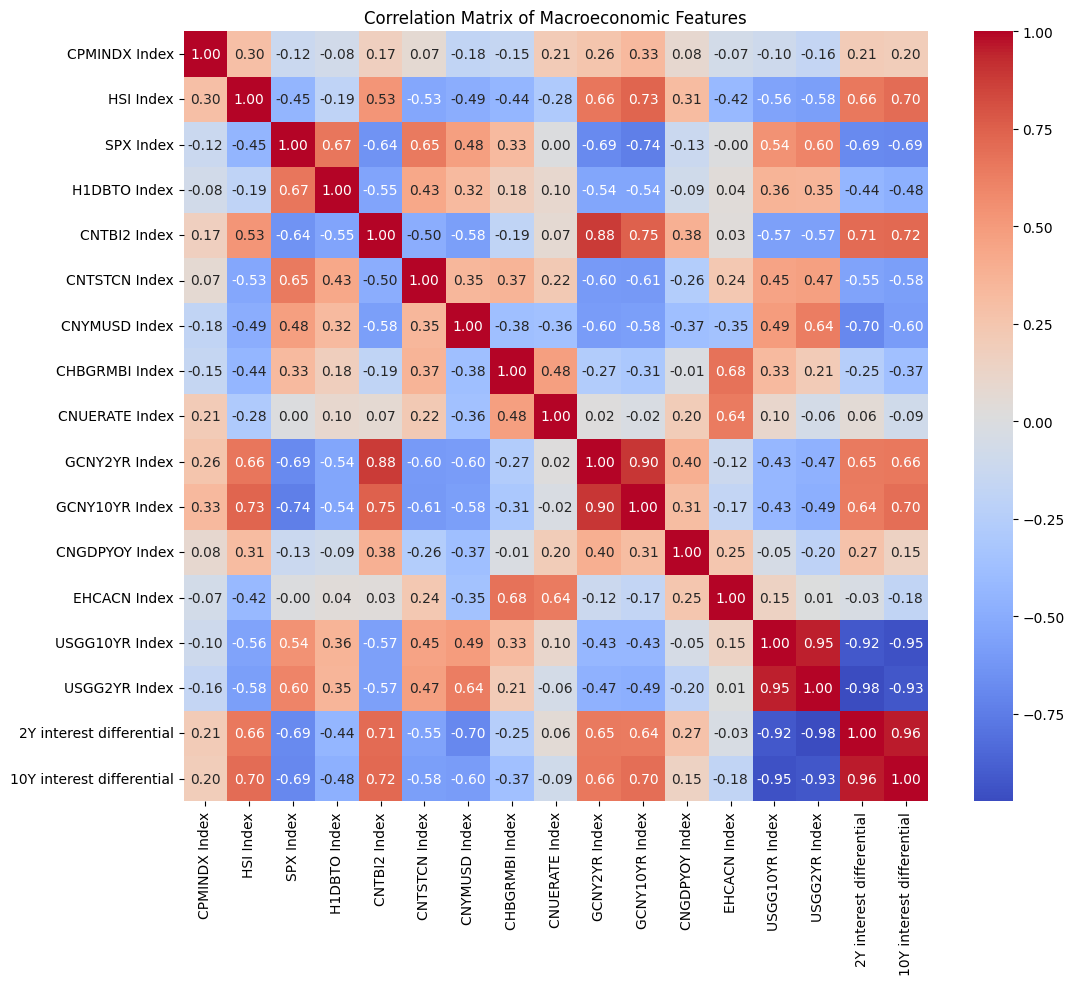

In [ ]:
# prompt: identify relationship between features

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Macroeconomic Features')
plt.show()


In [ ]:
# prompt: do a pca with all the  features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame as defined in the previous code

# Separate features (X)
X = df

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with all features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative Explained Variance Ratio
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Print or plot the explained variance ratio to see how much variance each component explains
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)


# You can now use X_pca for further analysis or visualization
# For example, to plot the first two principal components:

# from sklearn.decomposition import PCA

# # Create principal components
# pca = PCA()
# X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

display(X_pca.head())

# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1])
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("PCA of Macroeconomic Features")
# plt.show()



Explained Variance Ratio: [4.73096015e-01 1.60342573e-01 8.83254475e-02 7.31938195e-02
 6.00400435e-02 4.01279193e-02 2.95895169e-02 2.55274048e-02
 1.67573960e-02 1.47104147e-02 6.97987736e-03 4.76296019e-03
 3.42205409e-03 2.03318821e-03 1.09137035e-03 7.38769094e-18
 0.00000000e+00]
Cumulative Explained Variance: [0.47309601 0.63343859 0.72176404 0.79495785 0.8549979  0.89512582
 0.92471533 0.95024274 0.96700014 0.98171055 0.98869043 0.99345339
 0.99687544 0.99890863 1.         1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,3.644010,2.530775,0.835759,-0.690271,-0.430718,0.498075,0.478538,1.131742,-0.184820,-0.122671,-0.562170,0.009023,0.203472,-0.048848,0.498634,1.079763e-15,-4.788490e-15
1,3.691618,2.516538,0.802987,-0.667534,-0.415421,0.510369,0.484299,1.131931,-0.176846,-0.111548,-0.527928,-0.012409,0.187290,-0.062825,0.450847,1.006633e-15,-4.157949e-15
2,3.571770,2.611079,0.633942,-0.580669,-0.297640,0.605451,0.371029,1.169912,-0.096341,-0.211361,-0.623011,0.108787,-0.015998,-0.095663,0.358594,4.612432e-16,-2.902936e-15
3,3.618338,2.621473,0.568307,-0.668568,-0.378931,0.565013,0.434899,1.077124,-0.158286,-0.189915,-0.595654,0.133160,-0.006281,-0.120513,0.301938,8.368199e-17,-2.425355e-15
4,3.562983,2.645665,0.545708,-0.656441,-0.362117,0.628534,0.405178,0.983336,-0.170204,-0.140592,-0.565348,0.158602,-0.040681,-0.068590,0.274573,1.456451e-16,-1.976964e-15


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
CPMINDX Index,0.088067,0.044013,0.166920,0.661546,-0.497519,-0.065431,-0.017112,-0.357830,0.035034,-0.364962,-0.087975,-0.012466,-0.020316,-0.037102,-0.023485,-3.356516e-16,-2.448775e-17
HSI Index,0.270450,-0.160849,0.075835,0.323095,0.261146,0.299205,-0.058425,-0.077823,0.155787,0.292883,0.303645,-0.539529,-0.186957,0.247726,-0.184360,1.955351e-15,3.657135e-15
SPX Index,-0.283031,-0.006964,-0.086622,0.287388,0.257443,0.129776,0.339872,0.057895,-0.415332,-0.240552,0.540294,0.109979,0.215415,0.065564,0.206603,8.641713e-16,-2.219903e-15
H1DBTO Index,-0.206641,0.004887,-0.170927,0.434198,0.409872,0.086534,-0.397987,0.412688,0.310271,-0.207262,-0.247643,0.163340,-0.022394,-0.086727,0.009378,-4.755569e-16,-6.978018e-16
CNTBI2 Index,0.292408,0.100581,0.178229,-0.080329,-0.013992,-0.030243,0.367465,0.481191,0.008020,-0.405532,-0.081999,-0.247011,-0.448466,-0.027329,0.253672,1.332159e-15,-1.148608e-15
CNTSTCN Index,-0.245619,0.128698,-0.134973,0.279754,-0.233321,0.030761,0.584895,0.243181,0.280167,0.511160,-0.154280,0.067653,0.024001,-0.001162,-0.035625,9.832488e-17,3.341689e-16
CNYMUSD Index,-0.238479,-0.365336,0.040858,-0.045004,-0.115559,-0.414940,0.018893,0.173120,0.092439,-0.158157,0.156784,0.145923,-0.200023,0.563960,-0.390657,1.312186e-15,4.400829e-15
CHBGRMBI Index,-0.126471,0.473950,-0.071168,-0.118059,0.052562,0.520877,0.085762,-0.173990,-0.122198,-0.182409,-0.186138,0.172168,-0.271204,0.306754,-0.385391,-3.827045e-16,4.619839e-15
CNUERATE Index,-0.016736,0.494143,0.009658,0.162732,-0.191829,-0.282927,-0.368845,0.345398,-0.467699,0.281670,0.135418,-0.138094,-0.101804,0.033148,-0.099112,1.707347e-16,2.075774e-15
GCNY2YR Index,0.297726,0.035202,0.352682,-0.004914,-0.014943,0.131483,0.076368,0.329256,-0.029776,-0.105199,-0.131293,-0.004682,0.684101,0.149989,-0.315491,-8.638281e-02,-1.650976e-01


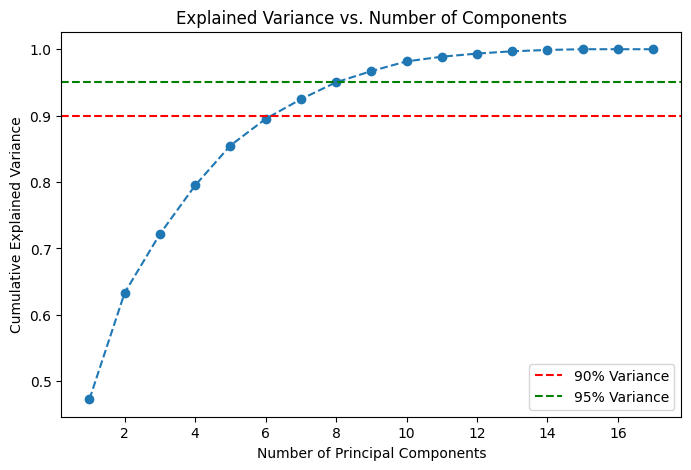

Optimal number of PCA components: 8


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 18), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# Find the optimal number of components
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {optimal_components}")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = macroeconomic indicators

# Apply PCA
pca = PCA(n_components=8)  # Keep 9 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert back to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(8)])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by each component: {explained_variance}")
print(f"Total variance explained by 9 components: {sum(explained_variance):.2f}")


Variance explained by each component: [0.47309601 0.16034257 0.08832545 0.07319382 0.06004004 0.04012792
 0.02958952 0.0255274 ]
Total variance explained by 9 components: 0.95


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Target variable (e.g., Real Effective Exchange Rate)
y = price[['CNH Curncy']].astype(float)
X_pca_df = X_pca_df.astype(float)
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, shuffle=False)  # No shuffle for time-series



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

xgb = XGBRegressor()
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


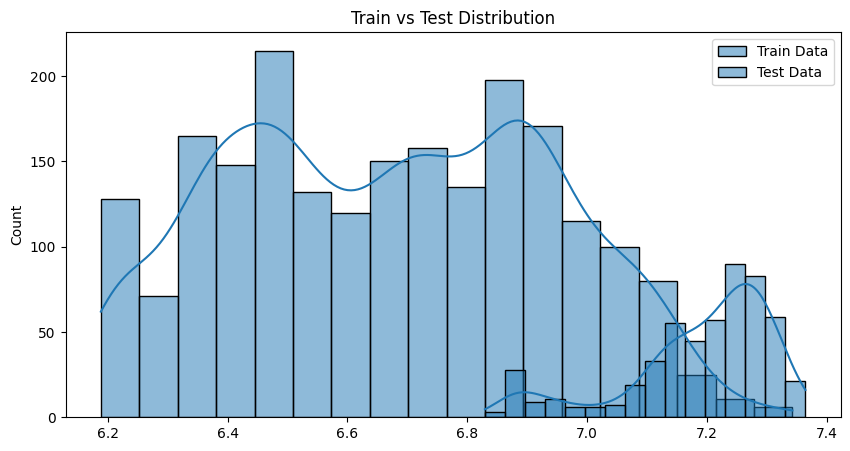

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(y_train, color='blue', label="Train Data", kde=True)
sns.histplot(y_test, color='red', label="Test Data", kde=True)
plt.legend()
plt.title("Train vs Test Distribution")
plt.show()


In [ ]:
best_xgb = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Compute R² Scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

Train R² Score: 0.9926
Test R² Score: -2.4593


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Make predictions
y_pred = model.predict(X_test)
# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 0.2246
MSE: 0.0961
RMSE: 0.3100
R² Score: -5.4941


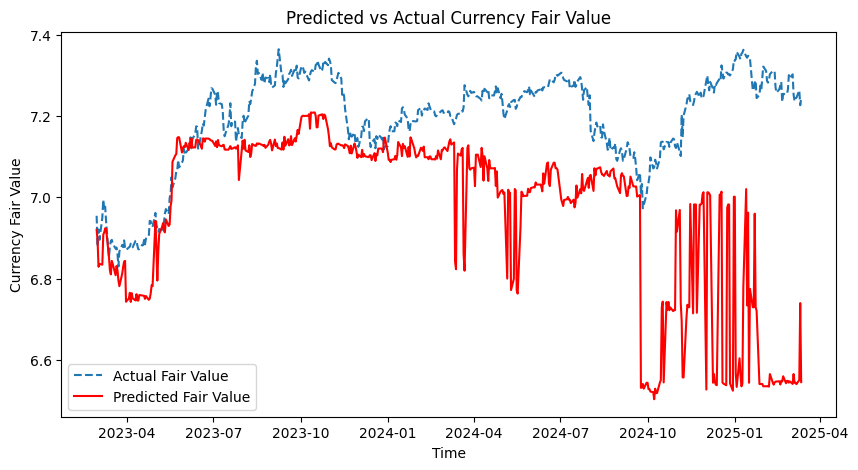

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index, y_pred, label="Predicted Fair Value", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("Predicted vs Actual Currency Fair Value")
plt.show()


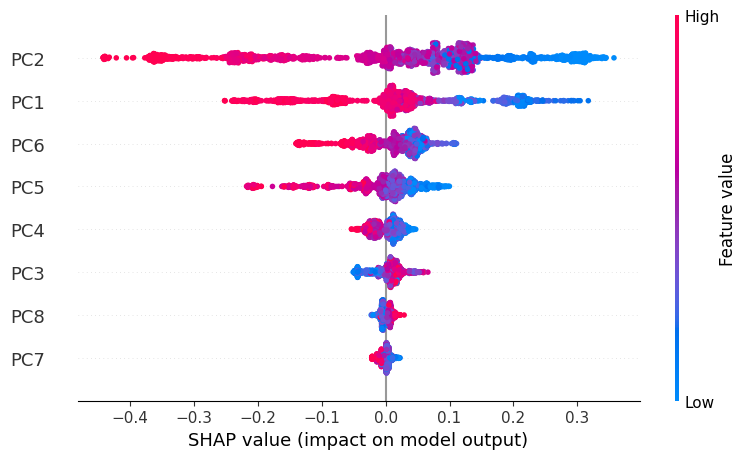

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_pca_df)

shap.summary_plot(shap_values, X_pca_df)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 23.0420 - val_loss: 0.7073
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.3848 - val_loss: 0.4072
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3213 - val_loss: 0.3392
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2637 - val_loss: 0.4556
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2301 - val_loss: 0.5938
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2180 - val_loss: 0.4822
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1991 - val_loss: 0.4378
Epoch 8/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1933 - val_loss: 0.4649
Epoch 9/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.1832 - val_loss: 0.7444
Epoch 10/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1780 - val_loss: 0.6757
Epoch 11/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1658 - val_loss: 0.7371
Epoch 12/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/st

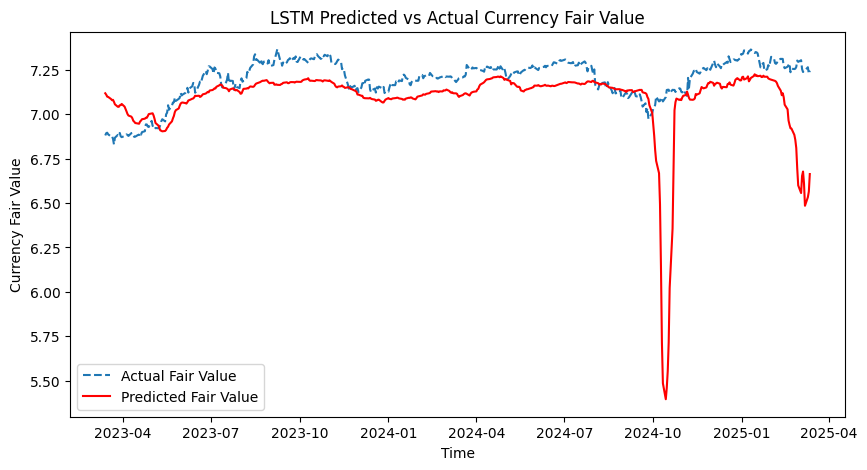

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load your dataset (X = macroeconomic variables, y = fair value of currency)
# X: (time series features), y: (target currency fair value)
# Make sure your dataset has a date index
# X, y = load_your_data() # Replace with actual data loading

# Standardize the data (important for PCA & LSTM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 9 components
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for better handling
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(9)], index=X.index)

# Split into training and testing sets
train_size = int(len(X_pca_df) * 0.8)
X_train, X_test = X_pca_df[:train_size], X_pca_df[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM: (samples, timesteps, features)
def create_lstm_data(X, y, time_steps=10):
    X_lstm, y_lstm = [], []
    for i in range(len(X) - time_steps):
        X_lstm.append(X.iloc[i : i + time_steps].values)
        y_lstm.append(y.iloc[i + time_steps])
    return np.array(X_lstm), np.array(y_lstm)

# Create LSTM data with time window of 10 days
time_steps = 10
X_train_lstm, y_train_lstm = create_lstm_data(X_train, y_train, time_steps)
X_test_lstm, y_test_lstm = create_lstm_data(X_test, y_test, time_steps)

# Define LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)  # Output layer
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train Model
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, validation_data=(X_test_lstm, y_test_lstm), verbose=1)

# Make Predictions
y_pred = model.predict(X_test_lstm)

# Plot Actual vs Predicted Fair Value
plt.figure(figsize=(10,5))
plt.plot(y_test.index[time_steps:], y_test_lstm, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index[time_steps:], y_pred, label="Predicted Fair Value", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("LSTM Predicted vs Actual Currency Fair Value")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_lstm, y_pred)
mse = mean_squared_error(y_test_lstm, y_pred)
rmse = np.sqrt(mse)
direction_accuracy = np.mean(np.sign(y_pred[:-1] - y_pred[1:]) == np.sign(y_test_lstm[:-1] - y_test_lstm[1:])) * 100

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Directional Accuracy: {direction_accuracy:.2f}%")


MAE: 0.1306
MSE: 0.0549
RMSE: 0.2344
Directional Accuracy: 46.07%


InvalidIndexError: (slice(None, None, None), array([2, 5, 4, 0, 1]))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load dataset (replace with actual data loading)
# X = macroeconomic variables, y = currency fair value
# Ensure the dataset has a time index
X = df
y = price[['CNH Curncy']].astype(float)

# Step 1: Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n=8
# Step 2: Apply PCA
pca = PCA(n_components=n)  # Reduce to 9 principal components
X_pca = pca.fit_transform(X_scaled)

# Convert PCA data to DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n)], index=X.index)

# Step 3: Split Train-Test Data
train_size = int(len(X_pca_df) * 0.8)
X_train_pca, X_test_pca = X_pca_df[:train_size], X_pca_df[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Train XGBoost Model on PCA Data
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)  # Tuned parameters
xgb.fit(X_train_pca, y_train)

# Step 5: Feature Importance Selection
feature_importance = xgb.feature_importances_
important_pca_features = np.argsort(feature_importance)[-5:]  # Select Top 5 PCA components
X_train_pca_important = X_train_pca.iloc[:, important_pca_features]
X_test_pca_important = X_test_pca.iloc[:, important_pca_features]

# # Step 6: Generate XGBoost Predictions for LSTM Input
# y_xgb_train_pred = xgb.predict(X_train_pca_important)
# y_xgb_test_pred = xgb.predict(X_test_pca_important)

y_xgb_train_pred = xgb.predict(X_train_pca_important, validate_features=False)
y_xgb_test_pred = xgb.predict(X_test_pca_important, validate_features=False)


# Step 7: Create Time-Series Sequences for LSTM
def create_lstm_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_lstm_train, y_lstm_train = create_lstm_sequences(y_xgb_train_pred, y_train, time_steps)
X_lstm_test, y_lstm_test = create_lstm_sequences(y_xgb_test_pred, y_test, time_steps)

# Step 8: Train LSTM Model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)
])

lstm.compile(optimizer="adam", loss="mean_squared_error")
lstm.fit(X_lstm_train, y_lstm_train, epochs=100, batch_size=16, validation_data=(X_lstm_test, y_lstm_test), verbose=1)

# Step 9: Make Final Hybrid Predictions
y_hybrid_pred = lstm.predict(X_lstm_test)

# Step 10: Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_lstm_test, y_hybrid_pred)
mse = mean_squared_error(y_lstm_test, y_hybrid_pred)
rmse = np.sqrt(mse)

print(f"Hybrid Model MAE: {mae:.4f}")
print(f"Hybrid Model MSE: {mse:.4f}")
print(f"Hybrid Model RMSE: {rmse:.4f}")

# Step 11: Visualize Predictions vs Actual
plt.figure(figsize=(10,5))
plt.plot(y_test.index[time_steps:], y_lstm_test, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index[time_steps:], y_hybrid_pred, label="Predicted Fair Value (Hybrid Model)", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("Hybrid Model: Predicted vs Actual Currency Fair Value")
plt.show()


XGBoostError: [14:28:10] /workspace/src/predictor/cpu_predictor.cc:789: Check failed: m->NumColumns() == model.learner_model_param->num_feature (5 vs. 8) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x25c1ac) [0x7ec199c5c1ac]
  [bt] (1) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x75ea80) [0x7ec19a15ea80]
  [bt] (2) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x75f6f6) [0x7ec19a15f6f6]
  [bt] (3) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5aa1e8) [0x7ec199faa1e8]
  [bt] (4) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x5fde69) [0x7ec199ffde69]
  [bt] (5) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(+0x16a7ac) [0x7ec199b6a7ac]
  [bt] (6) /usr/local/lib/python3.11/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromColumnar+0x10b) [0x7ec199b6afcb]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7ec22fddfe2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7ec22fddc493]



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df
y = price[['CNH Curncy']].astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Macroeconomic dataset

pca = PCA(n_components=9)  # Reduce to 9 features
X_pca = pca.fit_transform(X_scaled)


In [ ]:
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Train XGBoost on PCA data
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb.fit(X_pca, y)

# Select top PCA features
feature_importance = xgb.feature_importances_
important_pca_features = np.argsort(feature_importance)[-5:]
X_pca_selected = X_pca[:, important_pca_features]

# Reshape data for LSTM (Time Series)
def create_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target.iloc[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_lstm, y_lstm = create_sequences(X_pca_selected, y, time_steps)

# Train LSTM model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)
])
lstm.compile(optimizer="adam", loss="mean_squared_error")
lstm.fit(X_lstm, y_lstm, epochs=100, batch_size=16, verbose=1)

# Predict fair value
y_fair_value = lstm.predict(X_lstm)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 18.4295
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0622
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0216
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0135
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0116
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0098
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0093
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0080
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0077
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0067
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0063
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0059
Epoch 13/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0050
Epoch 14/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0048
Epoch 15/100
166/166 ━━━━━━━━━━━━━━━━━━━

In [ ]:
y_fair_value

array([[6.2646112],
       [6.2655287],
       [6.2646866],
       ...,
       [7.2521973],
       [7.2478256],
       [7.2484937]], dtype=float32)

In [ ]:
import numpy as np

deviation = (market_price - y_fair_value) / y_fair_value
threshold = 0.03  # 3% deviation

# Generate trade signals
long_signal = deviation < -threshold  # Buy when undervalued
short_signal = deviation > threshold  # Sell when overvalued


In [ ]:
position_size = np.abs(deviation) * 10000  # Adjust trade size dynamically

stop_loss = market_price * 0.98  # 2% SL
take_profit = y_fair_value  # TP at fair value


In [ ]:
initial_capital = 100000  # Starting capital
capital = initial_capital
pnl = []

for i in range(len(market_price)):
    if long_signal[i]:  # Buy trade
        entry_price = market_price[i]
        exit_price = y_fair_value[i]
        trade_pnl = (exit_price - entry_price) * position_size[i]
        capital += trade_pnl
    elif short_signal[i]:  # Sell trade
        entry_price = market_price[i]
        exit_price = y_fair_value[i]
        trade_pnl = (entry_price - exit_price) * position_size[i]
        capital += trade_pnl
    pnl.append(capital)

# Plot capital growth
import matplotlib.pyplot as plt

plt.plot(pnl, label="Capital Growth")
plt.xlabel("Time")
plt.ylabel("Equity ($)")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train (80%) and test (20%) sets before PCA
train_size = int(len(X) * 0.8)

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply same scaler

# Apply PCA on train and transform test
pca = PCA(n_components=9)  # Keep 9 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply same PCA transformation


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost on the PCA-transformed training set
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5)
xgb.fit(X_train_pca, y_train)

# Make predictions (train & test)
y_xgb_train_pred = xgb.predict(X_train_pca)
y_xgb_test_pred = xgb.predict(X_test_pca)


In [ ]:
import numpy as np

def create_lstm_sequences(data, target, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(data) - time_steps):
        X_seq.append(data[i:i+time_steps])
        y_seq.append(target.iloc[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10

# Convert XGBoost outputs into LSTM sequences
X_lstm_train, y_lstm_train = create_lstm_sequences(y_xgb_train_pred, y_train, time_steps)
X_lstm_test, y_lstm_test = create_lstm_sequences(y_xgb_test_pred, y_test, time_steps)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM Model
lstm = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_lstm_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1)
])

# Compile LSTM Model
lstm.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM
lstm.fit(X_lstm_train, y_lstm_train, epochs=100, batch_size=16, validation_data=(X_lstm_test, y_lstm_test), verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 28.9533 - val_loss: 0.2369
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0719 - val_loss: 0.2605
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0715 - val_loss: 0.2671
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0739 - val_loss: 0.2947
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0715 - val_loss: 0.2828
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0717 - val_loss: 0.2471
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0743 - val_loss: 0.2484
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0704 - val_loss: 0.2888
Epoch 9/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0696 - val_loss: 0.2941
Epoch 10/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0717 - val_loss: 0.3060
Epoch 11/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0714 - val_loss: 0.2708
Epoch 12/100
133/133 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Predict fair value for the test set
y_hybrid_pred = lstm.predict(X_lstm_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_lstm_test, y_hybrid_pred)
mse = mean_squared_error(y_lstm_test, y_hybrid_pred)
rmse = np.sqrt(mse)

print(f"Hybrid Model MAE: {mae:.4f}")
print(f"Hybrid Model MSE: {mse:.4f}")
print(f"Hybrid Model RMSE: {rmse:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Hybrid Model MAE: 0.1363
Hybrid Model MSE: 0.0264
Hybrid Model RMSE: 0.1625


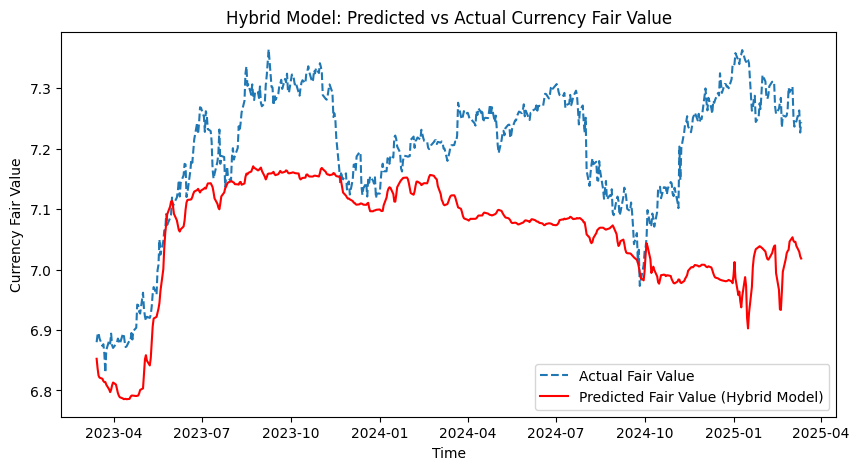

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.index[time_steps:], y_lstm_test, label="Actual Fair Value", linestyle='dashed')
plt.plot(y_test.index[time_steps:], y_hybrid_pred, label="Predicted Fair Value (Hybrid Model)", color='red')
plt.xlabel("Time")
plt.ylabel("Currency Fair Value")
plt.legend()
plt.title("Hybrid Model: Predicted vs Actual Currency Fair Value")
plt.show()
